<a href="https://colab.research.google.com/github/JapiKredi/Pinnacle_AI_program_AnalyticsVidyha/blob/main/Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cross Validation

In [13]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the data

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
data = pd.read_csv('/content/drive/My Drive/K_fold_cross_validation/data_cleaned.csv')

In [16]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [17]:
data.isnull().sum()

,0
Survived,0
Age,0
Fare,0
Pclass_1,0
Pclass_2,0
Pclass_3,0
Sex_female,0
Sex_male,0
SibSp_0,0
SibSp_1,0


### Segregating variables - Dependent & Independent

In [18]:
#separating independent and dependent variables

x = data.drop(['Survived'], axis=1)
y = data['Survived']

#### Scaling the data

In [19]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

In [20]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x, y, random_state = 96, stratify=y)

### Importing KNN

In [21]:
#importing KNN classifier and metric F1score

from sklearn.neighbors import KNeighborsClassifier as KNN

### Checking Consistency , using Cross Validation

In [22]:
from sklearn.model_selection import cross_val_score
score = cross_val_score( KNN(n_neighbors = 3), X = train_x, y = train_y, cv = 10)
score

array([0.76119403, 0.74626866, 0.76119403, 0.7761194 , 0.65671642,
       0.79104478, 0.8358209 , 0.80597015, 0.81818182, 0.74242424])

In [23]:
# Consistency using Mean and standard deviation in percentage
score.mean()*100, score.std()*100

(76.94934418815016, 4.768370000644409)

### Automating the process of cross validation for different K-Neighbors

In [24]:
def Val_score(n_neighbors):
    '''
  takes range of n_neighbors as input
  returns Mean and Standard Deviation for each value of n_neighbors
  '''
    avg = []
    std = []

    for i in n_neighbors:

    # 10 fold cross validation for every value of n_neighbor
      score = cross_val_score( KNN(n_neighbors = i) , X = train_x, y = train_y, cv = 10)

    # adding mean to avg list
      avg.append(score.mean())

    # adding standard deviation to std list
      std.append(score.std())

    return avg, std

In [25]:
n_neighbors = range(1,50)
mean, std = Val_score(n_neighbors)

### Ploting Mean Validation Score for each K value

Text(0.5, 1.0, 'Mean Validation score')

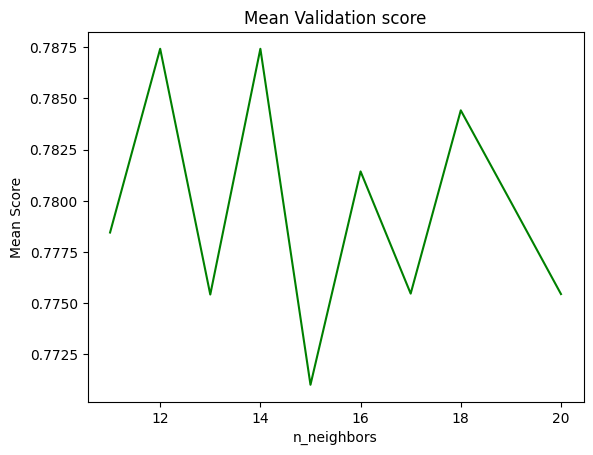

In [26]:
plt.plot(n_neighbors[10:20], mean[10:20], color = 'green', label = 'mean' )
plt.xlabel('n_neighbors')
plt.ylabel('Mean Score')
plt.title('Mean Validation score')

### Ploting Standard Deaviation Validation Score for each K value

Text(0.5, 1.0, 'Standard Deviation of Validation score')

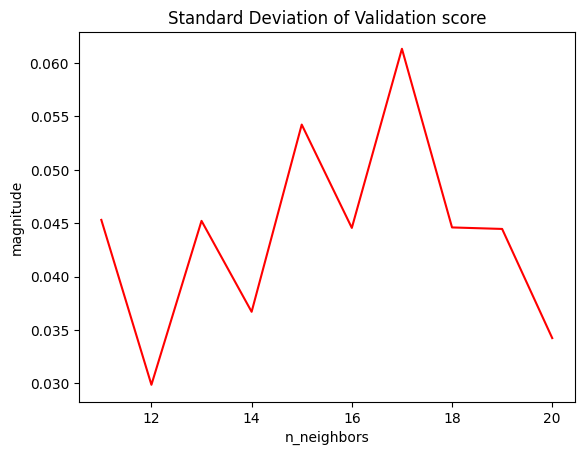

In [27]:
plt.plot(n_neighbors[10:20], std[10:20], color = 'red', label = 'Standard deviation' )
plt.xlabel('n_neighbors')
plt.ylabel('magnitude')
plt.title('Standard Deviation of Validation score')

### Trying the optimal model over test set

In [28]:
clf = KNN(n_neighbors = 14 )
clf.fit(train_x, train_y)

score1 = clf.score(train_x, train_y)

score = clf.score(test_x, test_y)
score, score1

(0.8161434977578476, 0.811377245508982)